In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_ollama import ChatOllama

llm = ChatOllama(model='mistral')

In [6]:
# Schema for structured output
from pydantic import BaseModel, Field

class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Query that is optimized web search.")
    justification: str = Field(
        None, description="Why this query is relevant to the user's request."
    )


# Augment the LLM with schema for structured output
structured_llm = llm.with_structured_output(SearchQuery)

# Invoke the augmented LLM
output = structured_llm.invoke("How does Calcium CT score relate to high cholesterol?")
print(output)

# Define a tool
def multiply(a: int, b: int) -> int:
    return a * b

# Augment the LLM with tools
llm_with_tools = llm.bind_tools([multiply])

# Invoke the LLM with input that triggers the tool call
msg = llm_with_tools.invoke("What is 2 times 3?")

# Get the tool call
msg.tool_calls
print(msg)

None
content='' additional_kwargs={} response_metadata={'model': 'mistral', 'created_at': '2025-03-14T05:52:52.087833Z', 'done': True, 'done_reason': 'stop', 'total_duration': 16547798458, 'load_duration': 6217228, 'prompt_eval_count': 76, 'prompt_eval_duration': 3162000000, 'eval_count': 77, 'eval_duration': 13378000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)} id='run-204afa37-762e-4ccc-a185-406dd1a6f4bf-0' tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': '45cccd05-54e4-4036-a875-27574ad0f839', 'type': 'tool_call'}] usage_metadata={'input_tokens': 76, 'output_tokens': 77, 'total_tokens': 153}


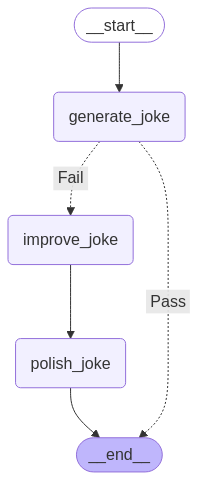

Initial joke:
 Why was the cat sitting on the computer keyboard? Because it wanted to type "cat" into the search engine!

--- --- ---

Improved joke:
 Why was the cat perched precariously on the computer's QWERTY-board? To purrfect its trick of typing "cat" into the search engine... and proving that it's not just a feline fib!

--- --- ---

Final joke:
 Why was the cat perched precariously on the computer's QWERTY-board, seemingly oblivious to the danger? To purrfect its cunning plan of sending an email to NASA, claiming to be an extraterrestrial life form made entirely of yarn and string - and convincing them it wasn't just a catty hoax!


In [7]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str


# Nodes
def generate_joke(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}


def check_punchline(state: State):
    """Gate function to check if the joke has a punchline"""

    # Simple check - does the joke contain "?" or "!"
    if "?" in state["joke"] or "!" in state["joke"]:
        return "Fail"
    return "Pass"


def improve_joke(state: State):
    """Second LLM call to improve the joke"""

    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}


def polish_joke(state: State):
    """Third LLM call for final polish"""

    msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}


# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_joke", generate_joke)
workflow.add_node("improve_joke", improve_joke)
workflow.add_node("polish_joke", polish_joke)

# Add edges to connect nodes
workflow.add_edge(START, "generate_joke")
workflow.add_conditional_edges(
    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}
)
workflow.add_edge("improve_joke", "polish_joke")
workflow.add_edge("polish_joke", END)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

# Invoke
state = chain.invoke({"topic": "cats"})
print("Initial joke:")
print(state["joke"])
print("\n--- --- ---\n")
if "improved_joke" in state:
    print("Improved joke:")
    print(state["improved_joke"])
    print("\n--- --- ---\n")

    print("Final joke:")
    print(state["final_joke"])
else:
    print("Joke failed quality gate - no punchline detected!")

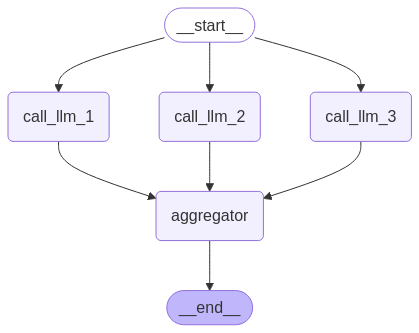

Here's a story, joke, and poem about cats!

STORY:
 Title: Whiskers' Chronicles: The Purrfect Adventure

In the heart of the mystical kingdom of Felisia, nestled between the Whiskerwood Forest and the River of Milk, stood the grandiose Palace of the Purrfect. The palace was home to a multitude of extraordinary cats from all corners of the realm - from the elegant Siamese with their sapphire eyes to the curious British Blue who never failed to intrigue. But among all these felines, there was one cat who stood out, a tabby named Whiskers.

Whiskers was not like the other cats in Felisia. He had an insatiable curiosity and a heart full of courage. Unlike his peers, who spent their days lounging by the hearth or chasing after their tails, Whiskers longed for adventure and new experiences. He yearned to explore the vast lands beyond the palace walls, to uncover secrets hidden within the ancient Whiskerwood Forest, and to discover far-off lands teeming with mysteries and wonders.

One fatefu

In [8]:
# Graph state
class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str


# Nodes
def call_llm_1(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a joke about {state['topic']}")
    return {"joke": msg.content}


def call_llm_2(state: State):
    """Second LLM call to generate story"""

    msg = llm.invoke(f"Write a story about {state['topic']}")
    return {"story": msg.content}


def call_llm_3(state: State):
    """Third LLM call to generate poem"""

    msg = llm.invoke(f"Write a poem about {state['topic']}")
    return {"poem": msg.content}


def aggregator(state: State):
    """Combine the joke and story into a single output"""

    combined = f"Here's a story, joke, and poem about {state['topic']}!\n\n"
    combined += f"STORY:\n{state['story']}\n\n"
    combined += f"JOKE:\n{state['joke']}\n\n"
    combined += f"POEM:\n{state['poem']}"
    return {"combined_output": combined}


# Build workflow
parallel_builder = StateGraph(State)

# Add nodes
parallel_builder.add_node("call_llm_1", call_llm_1)
parallel_builder.add_node("call_llm_2", call_llm_2)
parallel_builder.add_node("call_llm_3", call_llm_3)
parallel_builder.add_node("aggregator", aggregator)

# Add edges to connect nodes
parallel_builder.add_edge(START, "call_llm_1")
parallel_builder.add_edge(START, "call_llm_2")
parallel_builder.add_edge(START, "call_llm_3")
parallel_builder.add_edge("call_llm_1", "aggregator")
parallel_builder.add_edge("call_llm_2", "aggregator")
parallel_builder.add_edge("call_llm_3", "aggregator")
parallel_builder.add_edge("aggregator", END)
parallel_workflow = parallel_builder.compile()

# Show workflow
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

# Invoke
state = parallel_workflow.invoke({"topic": "cats"})
print(state["combined_output"])

In [20]:
from typing_extensions import Literal
from langchain_core.messages import HumanMessage, SystemMessage


# Schema for structured output to use as routing logic
class Route(BaseModel):
    step: Literal["poem", "story", "joke"] = Field(
        None, description="The next step in the routing process"
    )


# Augment the LLM with schema for structured output
router = llm.with_structured_output(Route)


# State
class State(TypedDict):
    input: str
    decision: str
    output: str


# Nodes
def llm_call_1(state: State):
    """Write a story"""

    result = llm.invoke(state["input"])
    return {"output": result.content}


def llm_call_2(state: State):
    """Write a joke"""

    result = llm.invoke(state["input"])
    return {"output": result.content}


def llm_call_3(state: State):
    """Write a poem"""

    result = llm.invoke(state["input"])
    return {"output": result.content}


def llm_call_router(state: State):
    """Route the input to the appropriate node"""

    # Run the augmented LLM with structured output to serve as routing logic
    decision = router.invoke(
        [
            SystemMessage(
                content="Route the input to story, joke, or poem based on the user's request."
            ),
            HumanMessage(content=state["input"]),
        ]
    )
    
    return {"decision": decision.step if decision and hasattr(decision, "step") else "default"}


# Conditional edge function to route to the appropriate node
def route_decision(state: State):
    # Return the node name you want to visit next
    if state["decision"] == "story":
        return "llm_call_1"
    elif state["decision"] == "joke":
        return "llm_call_2"
    else:
        return "llm_call_3"


# Build workflow
router_builder = StateGraph(State)

# Add nodes
router_builder.add_node("llm_call_1", llm_call_1)
router_builder.add_node("llm_call_2", llm_call_2)
router_builder.add_node("llm_call_3", llm_call_3)
router_builder.add_node("llm_call_router", llm_call_router)

# Add edges to connect nodes
router_builder.add_edge(START, "llm_call_router")
router_builder.add_conditional_edges(
    "llm_call_router",
    route_decision,
    {  # Name returned by route_decision : Name of next node to visit
        "llm_call_1": "llm_call_1",
        "llm_call_2": "llm_call_2",
        "llm_call_3": "llm_call_3",
    },
)
router_builder.add_edge("llm_call_1", END)
router_builder.add_edge("llm_call_2", END)
router_builder.add_edge("llm_call_3", END)

# Compile workflow
router_workflow = router_builder.compile()

# Show the workflow
# display(Image(router_workflow.get_graph().draw_mermaid_png()))

# Invoke
state = router_workflow.invoke({"input": "Write me a joke about cats"})
print(state["output"])
state = router_workflow.invoke({"input": "Write me a story about cats"})
print(state["output"])
state = router_workflow.invoke({"input": "Write me a poem about cats"})
print(state["output"])

 Why don't cats play poker in the jungle? Because there are too many cheetahs!
 Title: Whiskers' Tale: A Feline Friendship

In the heart of the bustling city, where towering skyscrapers kissed the azure sky and the rhythm of life echoed through every alleyway, there lived two extraordinary felines named Whiskers and Paws. They were not your ordinary cats; they were urban jungle explorers who reveled in the sights, sounds, and scents that filled their daily lives.

Whiskers was a sleek, agile Siamese with a coat as shiny as the city's steel buildings. He had piercing green eyes that sparkled like emeralds, and his agility was unmatched. Paws, on the other hand, was a fluffy, tabby Persian with a gentle demeanor and a heart as big as the city itself. His fur was the color of autumn leaves, soft and inviting to the touch, and he had a knack for finding tranquility amidst the chaos.

Their friendship began on a fateful day when they met at the local pet store. Whiskers, being a street cat,